# Be Suspicious Of Online Movie Ratings, Especially Fandango’s
Based on <a  href="https://fivethirtyeight.com/features/fandango-movies-ratings/">an article</a> of the same title by <a href="https://fivethirtyeight.com/">FiveThirtyEight</a><br>
*Analysis by Raghav_A*

## Background
In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

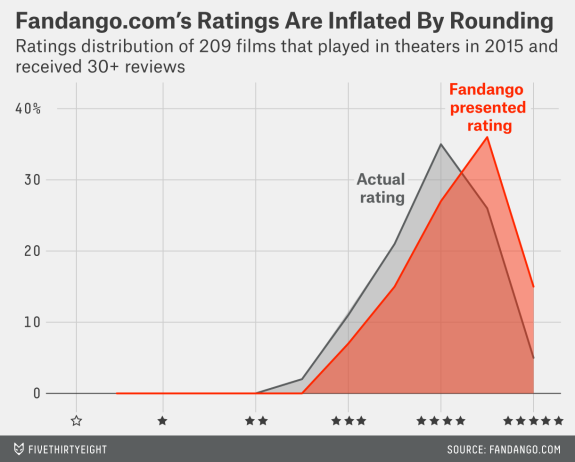

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

1. The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
2. In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
3. For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

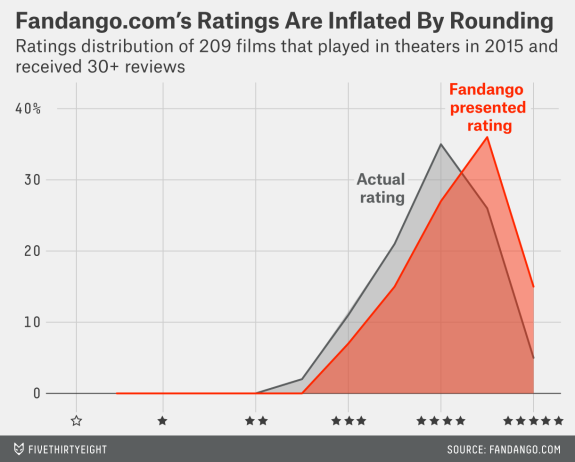

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data
One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, the team at Dataquest had ready-made data for both these periods of time:

1. Walt Hickey made the data he analyzed publicly available on <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">GitHub</a>. We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.
2. One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on <a href="https://github.com/mircealex/Movie_ratings_2016_17">GitHub</a> and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fandango15 = pd.read_csv('fandango_score_comparison.csv')
fandango1617 = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
fandango15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [3]:
fandango1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [4]:
fandango15[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0


In [5]:
fandango1617[['movie', 'year', 'fandango']]

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
...,...,...,...
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5


## Is the sampling *truly* random?
By reading the README.md files of the two repositories and Walt Hickey's article (the Github links for which are provided above), we are able to figure out that the two samples are NOT representative of the population we're trying to describe, since the samples are not chosen at random. We conclude this because - 
1. Movies with only 30 or more fan reviews are chosen in the `Fandango's 2015` dataset
2. The `Fandango's 2016-17` dataset "contains movie ratings data for 214 of the **most popular** movies". It doesn't explicitly specify what the parameters for the most popular movies are, hence we should assume that the dataset excludes the movies that weren't popular from its sampling.

## Changing the Goal of our Analysis
At this point, we have at least two alternatives: 
1. Either we collect new data, or
2. We change the goal of our analysis by placing some limitations on it.
Tweaking our goal seems a much faster choice compared to collecting new data. Also, it's quasi-impossible to collect a new sample previous to Hickey's analysis at this moment in time.

Since we already have the 2015 and 2016 movie ratings dataset for Fandango, changing our goal to finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016 would -

1. change our population of interest and make the samples we are currently working with representative, and 
2. the new goal would still be a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

Thus, our new goal of the analysis would be -
***Finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016***

## Isolating the Samples We Need
In order to isolate the samples from the dataset, we need to - 
1. check if the movies in both dataset have a minimum of 30 user ratings, and
2. checking whether the `fandango15` dataset has movies released in the year 2015 only, and likewise for the `fandango1617` dataset

### Checking `fandango15` & `fandango1617` datasets for unpopular movies
We see that the minimum user reviews a movie in the `fandango15` dataset has is 35. THus, our dataset is representative, and no further sampling needs to be done here.

In [6]:
# checking minimum user ratings a movie from fandango 2015 dataset has...
fandango15['Fandango_votes'].min()

35

Since the `fandango1617` dataset doesn't have any field value that explains the user ratings for every movie (and the readme.MD file of the dataset doesn't provide any criteria for movie-popularity), it is up to us to randomly select a few movies from the dataset, and check manually from `Fandango`'s website - what percentage of movies have greater than 30 user reviews, and see if its a number we can live with.

In [7]:
fandango1617['movie'].sample(10, random_state = 0)

197      The Take (Bastille Day)
37              Come and Find Me
89                     Kickboxer
176                  The Founder
170                 The Darkness
75     Ice Age: Collision Course
96                          Lion
137                 Ride Along 2
5                A Monster Calls
83                Jane Got a Gun
Name: movie, dtype: object

On checking manually the number of user ratings for these 10 movies, we get the following values - 

|            Movie          |   No. of User Ratings |
|             :-:           |            :-:        |
| The Take (Bastille Day)   |          3808         |
| Come and Find Me          | 558                  |
| Kickboxer                 | 1117                  |
| The Founder               | 32327                 |
| The Darkness              | 6711                  |
| Ice Age: Collision Course | 33041                 |
| Lion                      | 39745                 |
| Ride Along 2              | 35037                 |
| A Monster Calls           | 25265                 |
| Jane Got a Gun            | 14054                 |

Having checked that non of the movies from our random sample seem to have below 30 user ratings, we assume that the movies in the `fandango1617` dataset are indeed popular, and the dataset looks good.

### Checking `fandango15` & `fandango1617` datasets for inconsistencies in the `year` column
On checking tha datasets, we find that -
1. `fandango1617` dataset has 23 movies from 2017 year.
2. `fandango15` dataset doesn't have a `year` column.

Fortunately though, the `fandango15` dataset has the movie years in parentheses in the `FILM` column itself. In order to analyse the `year` of release of the movies, we need to extract the year from the `FILM` columns, and store it in a new columns (let's call it `year`).

On doing that, we find out that 
* the `fandango15` dataset has 17 movies from 2014 year.

Thus, we will remove/drop all those rows that have 2017 and 2014 values in the `year` columns in both the datasets. Also, let's rename the filtered `fandango1617` dataset as simply `fandango16` dataset, and overwrite the `fandango15` dataset with the new-filtered one.

In [8]:
fandango1617['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

In [9]:
fandango15['year'] = fandango15['FILM'].str.extract(r"\((\d+)\)")
fandango15['year'].value_counts(dropna=False)

2015    129
2014     17
Name: year, dtype: int64

In [15]:
fandango16 = fandango1617[fandango1617['year']==2016]
fandango15 = fandango15[fandango15['year']=='2015']
fandango15['FILM'] = fandango15['FILM'].str.replace(r"\((\d+)\)",'').copy()

## Comparing Distribution Shapes for 2015 vs 2016 Fandango Movie ratings
After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

In [27]:
fandango15.shape

(129, 23)

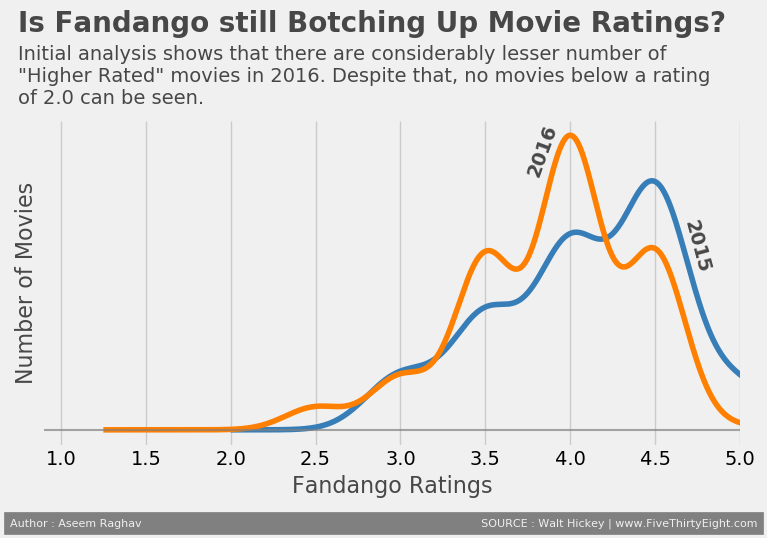

In [238]:
plt.style.use('fivethirtyeight')
fig, graph = plt.subplots(figsize=(8,4))

# Plotting KDE for the 2 datasets in a single graph...
graph = fandango15['Fandango_Stars'].plot.kde(label='2015', c='#377eb8')
graph = fandango16['fandango'].plot.kde(label='2016',  c='#ff7f00')

# Removing spines...
for spine in graph.spines.values():
    spine.set_visible(False)
    
# Setting x-limits, x and y axis labels... (We'll add the "Title" and "Subtitle" using text annotations, which
# allows us higher customisation)
graph.set(xlim=(0.9,5))
graph.set_xlabel('Fandango Ratings',fontsize = 16, alpha=0.7, color='black')
graph.set_ylabel('Number of Movies',fontsize = 16, alpha=0.7, color='black')

# Customising ticks and tick labels...
graph.set_yticks([])

# Adding a Horizontal Line at y=0... (for aesthetics)
graph.axhline(0,linewidth=1.5, alpha=0.7, color = 'grey')

# Generating a Signature Bar... (at the bottom)
graph.text(s='Author : Aseem Raghav                                                                                                 SOURCE : Walt Hickey | www.FiveThirtyEight.com',
          x=0.7, y=-0.3, fontsize=8, backgroundcolor = 'grey', color = '#f0f0f0')

# Adding Title and Subtitle... (using Text Annotations)
graph.text(s = 'Is Fandango still Botching Up Movie Ratings?',
           x = 0.75, y= 1.25, weight = 'bold', fontsize = 20, alpha = 0.7)
graph.text(s = 
           """Initial analysis shows that there are considerably lesser number of 
\"Higher Rated\" movies in 2016. Despite that, no movies below a rating 
of 2.0 can be seen.""",
           x = 0.75, y= 1.025, fontsize = 14, alpha = 0.7)

# Adding legends as floating text...
graph.text(s = '2016',x = 3.73, y= 0.8, weight='bold', fontsize = 14, alpha = 0.7, rotation=70)
graph.text(s = '2015',x = 4.65, y= 0.5, weight='bold', fontsize = 14, alpha = 0.7, rotation=-75)

plt.show()

##Observations: <br>...

The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information by analysing either frequency distribution tables, or histograms.

In [249]:
# total number of movies in 2015 and 2016...
print('2015 :',fandango15.shape[0],'Movies\n2016 :',fandango16.shape[0],'Movies')

2015 : 129 Movies
2016 : 191 Movies


In [251]:
fandango15['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [300]:
fandango16['fandango'].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [303]:
fandango16['fandango'].mode()

0    4.0
dtype: float64

### Comparing 2015 vs 2016 Summary Statistics


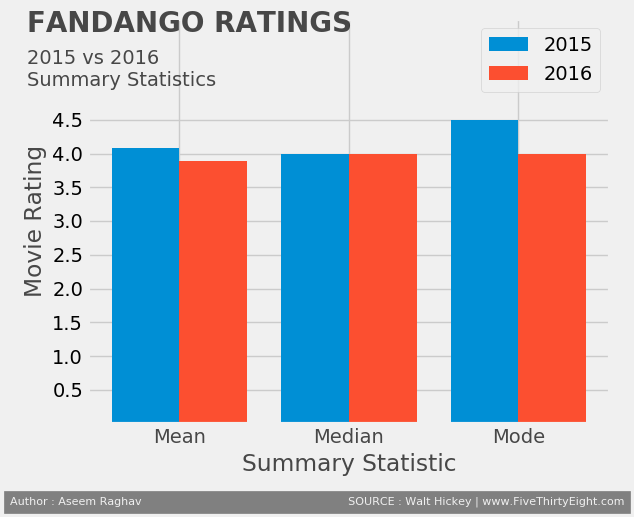

In [400]:
# Creating empty mean, median and mode lists...
list2015 = []
list2016 = []

# Summary Statistics of 'fandango15'...
list2015.append(fandango15['Fandango_Stars'].mean())
list2015.append(fandango15['Fandango_Stars'].median())
list2015.append(fandango15['Fandango_Stars'].mode()[0])

# Summary Statistics of 'fandango16'...
list2016.append(fandango16['fandango'].mean())
list2016.append(fandango16['fandango'].median())
list2016.append(fandango16['fandango'].mode()[0])

# Displaying a grouped barplot for comparison...
fig,ax=plt.subplots(figsize=(6,5))
ax.set_ylim(0,6)
ax.bar(np.arange(1,4)-0.2, height=list2015, width=0.4,label = '2015')
ax.bar(np.arange(1,4)+0.2, height=list2016, width=0.4,label='2016')
ax.text(s='FANDANGO RATINGS', fontsize=20, weight='bold',color = 'black',alpha=0.7,x=0.1, y=5.8)
ax.text(s='2015 vs 2016\nSummary Statistics',color = 'black',alpha=0.7,x=0.1, y=5)
ax.set_yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5])
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Mean','Median','Mode'], alpha=0.7)
ax.set_xlabel('Summary Statistic',alpha=0.7)
ax.set_ylabel('Movie Rating', alpha=0.7)
plt.legend(loc = 'upper right')

# Generating a Signature Bar... (at the bottom)
ax.text(s='Author : Aseem Raghav                                                           SOURCE : Walt Hickey | www.FiveThirtyEight.com',
          x=0, y=-1.2, fontsize=8, backgroundcolor = 'grey', color = '#f0f0f0')
plt.show()